In [1]:
# Load Packages
library(Pando)
library(Seurat)
library(Signac)
library(BSgenome.Hsapiens.UCSC.hg38)
library(SeuratObject)
library(tidyverse) # need this for pivot_wider()

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:Pando’:

    LayerData, VariableFeatures


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘Seurat’


The following objects are masked from ‘package:Pando’:

    GetAssay, VariableFeatures


Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Po

## Running Pando
08c_pando_ngc.R

# Full sample run

In [2]:
# load output from R script
sobj <- readRDS("08c_pando_objects/08c_ngc_pando_sobj_2.rds")
modules <- readRDS("08c_pando_objects/08c_ngc_pando_modules_2.rds")

In [3]:
GetNetwork(sobj)

A Network object
with 238 TFs and 443 target genes

In [ ]:
# params of models
# dataframe of coeff's and p-vals for each tf/region-target pair
coef(sobj)
write.csv(coefs, "08c_pando_objects/08c_ngc_pando_coefs.csv")

## Visualizing the GRN

In [10]:
sobj <- get_network_graph(sobj)

Computing gene-gene correlation

Computing weighted regulatory factor

Computing UMAP embedding

Getting network graph



In [ ]:
sobj <- get_network_graph(
    sobj, 
    graph_name = 'full_graph', 
    umap_method = 'none'
)

Getting network graph



### Graph visualization
Here, the nodes are colored and sized based on their centrality in the graph and the edges are colored by the direction of the regulation (inhibitory: grey; activating: orange)

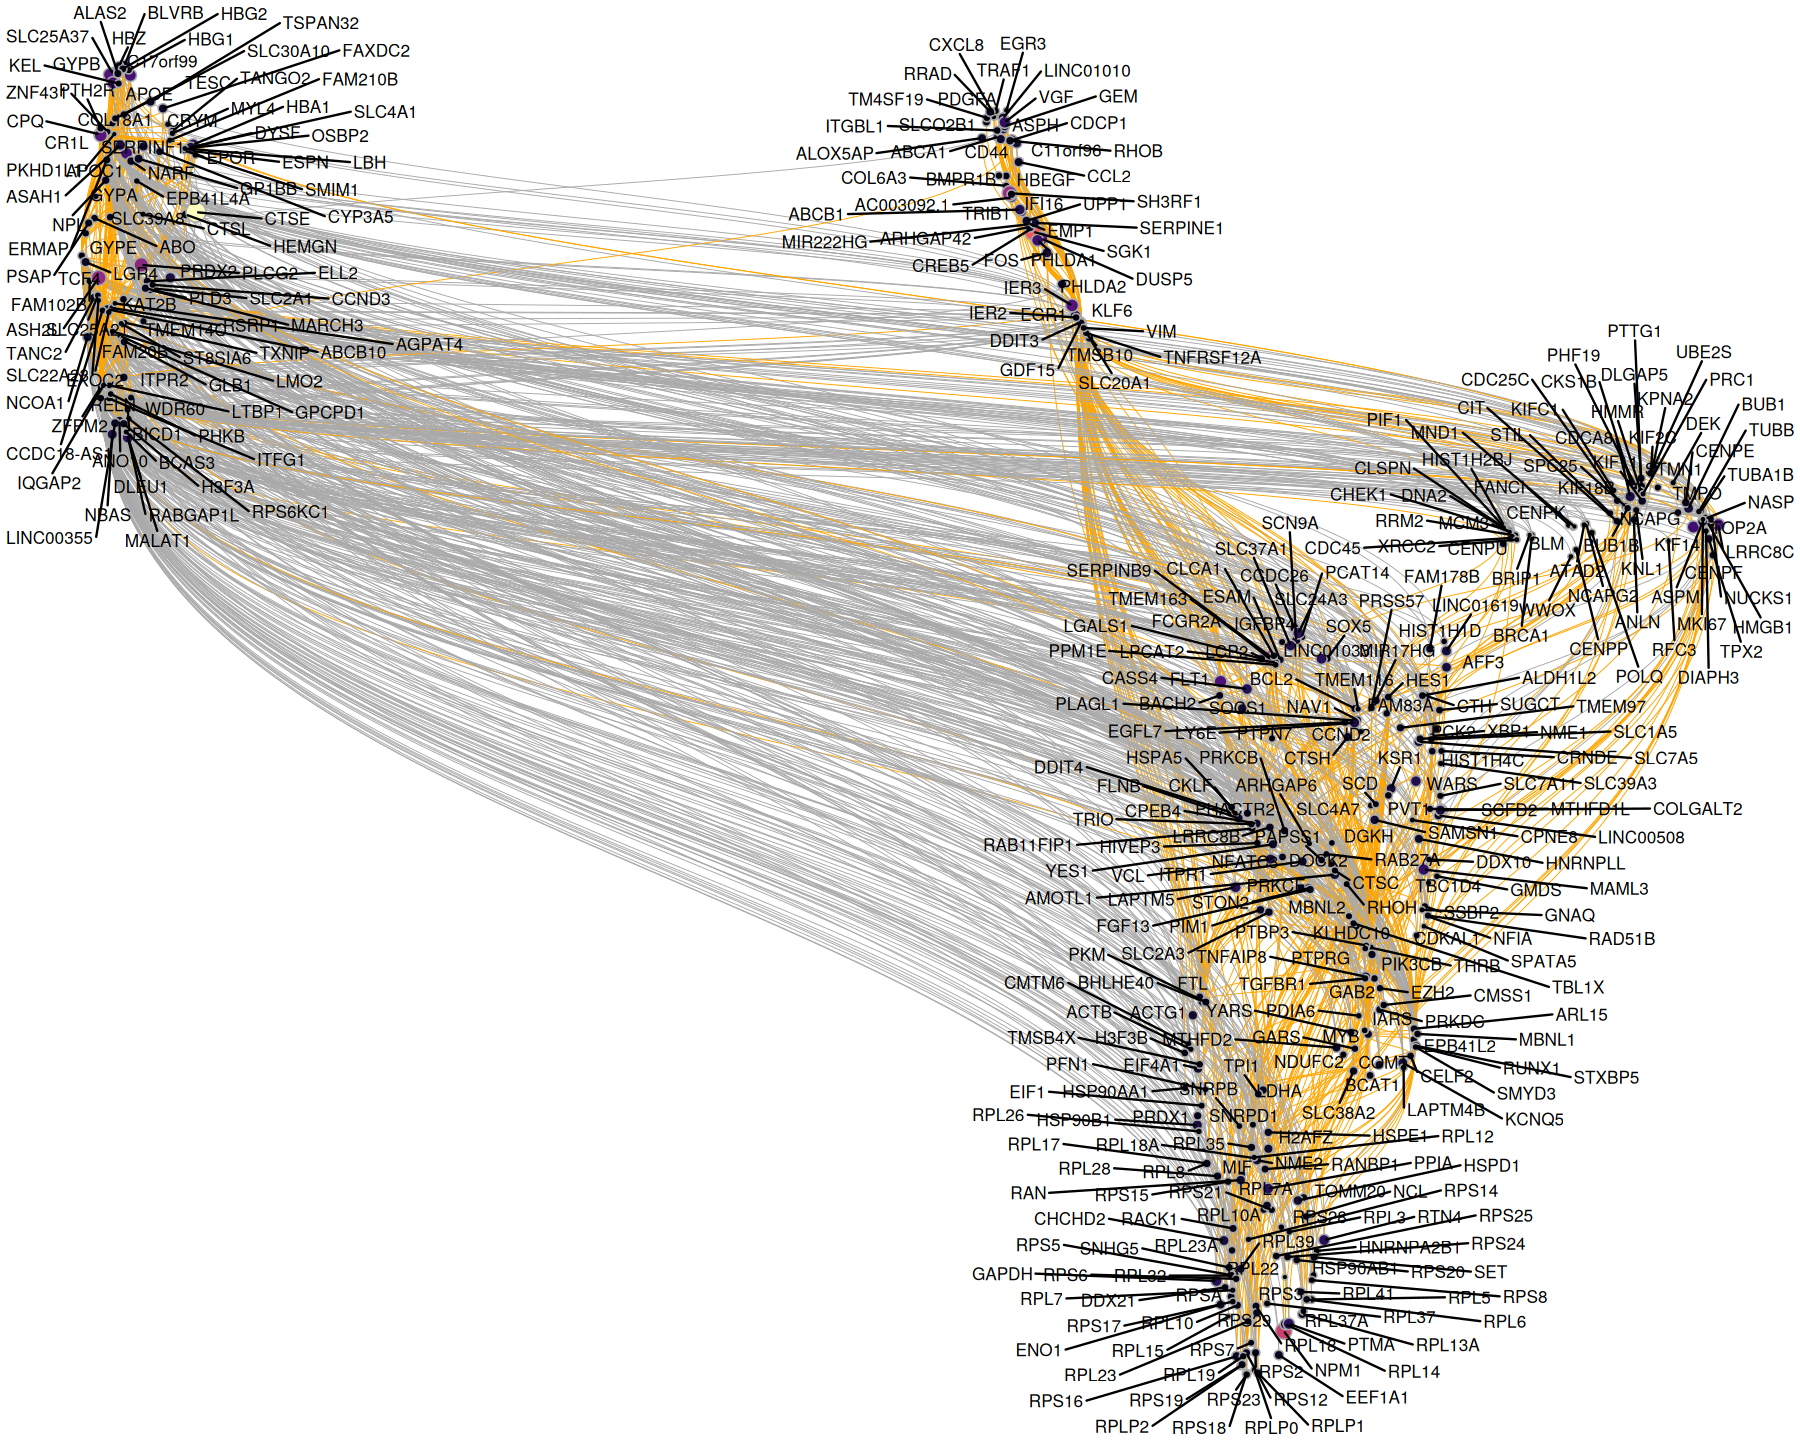

In [ ]:
# visualize GRN
options(repr.plot.width=15, repr.plot.height=12)
plot_network_graph(sobj)

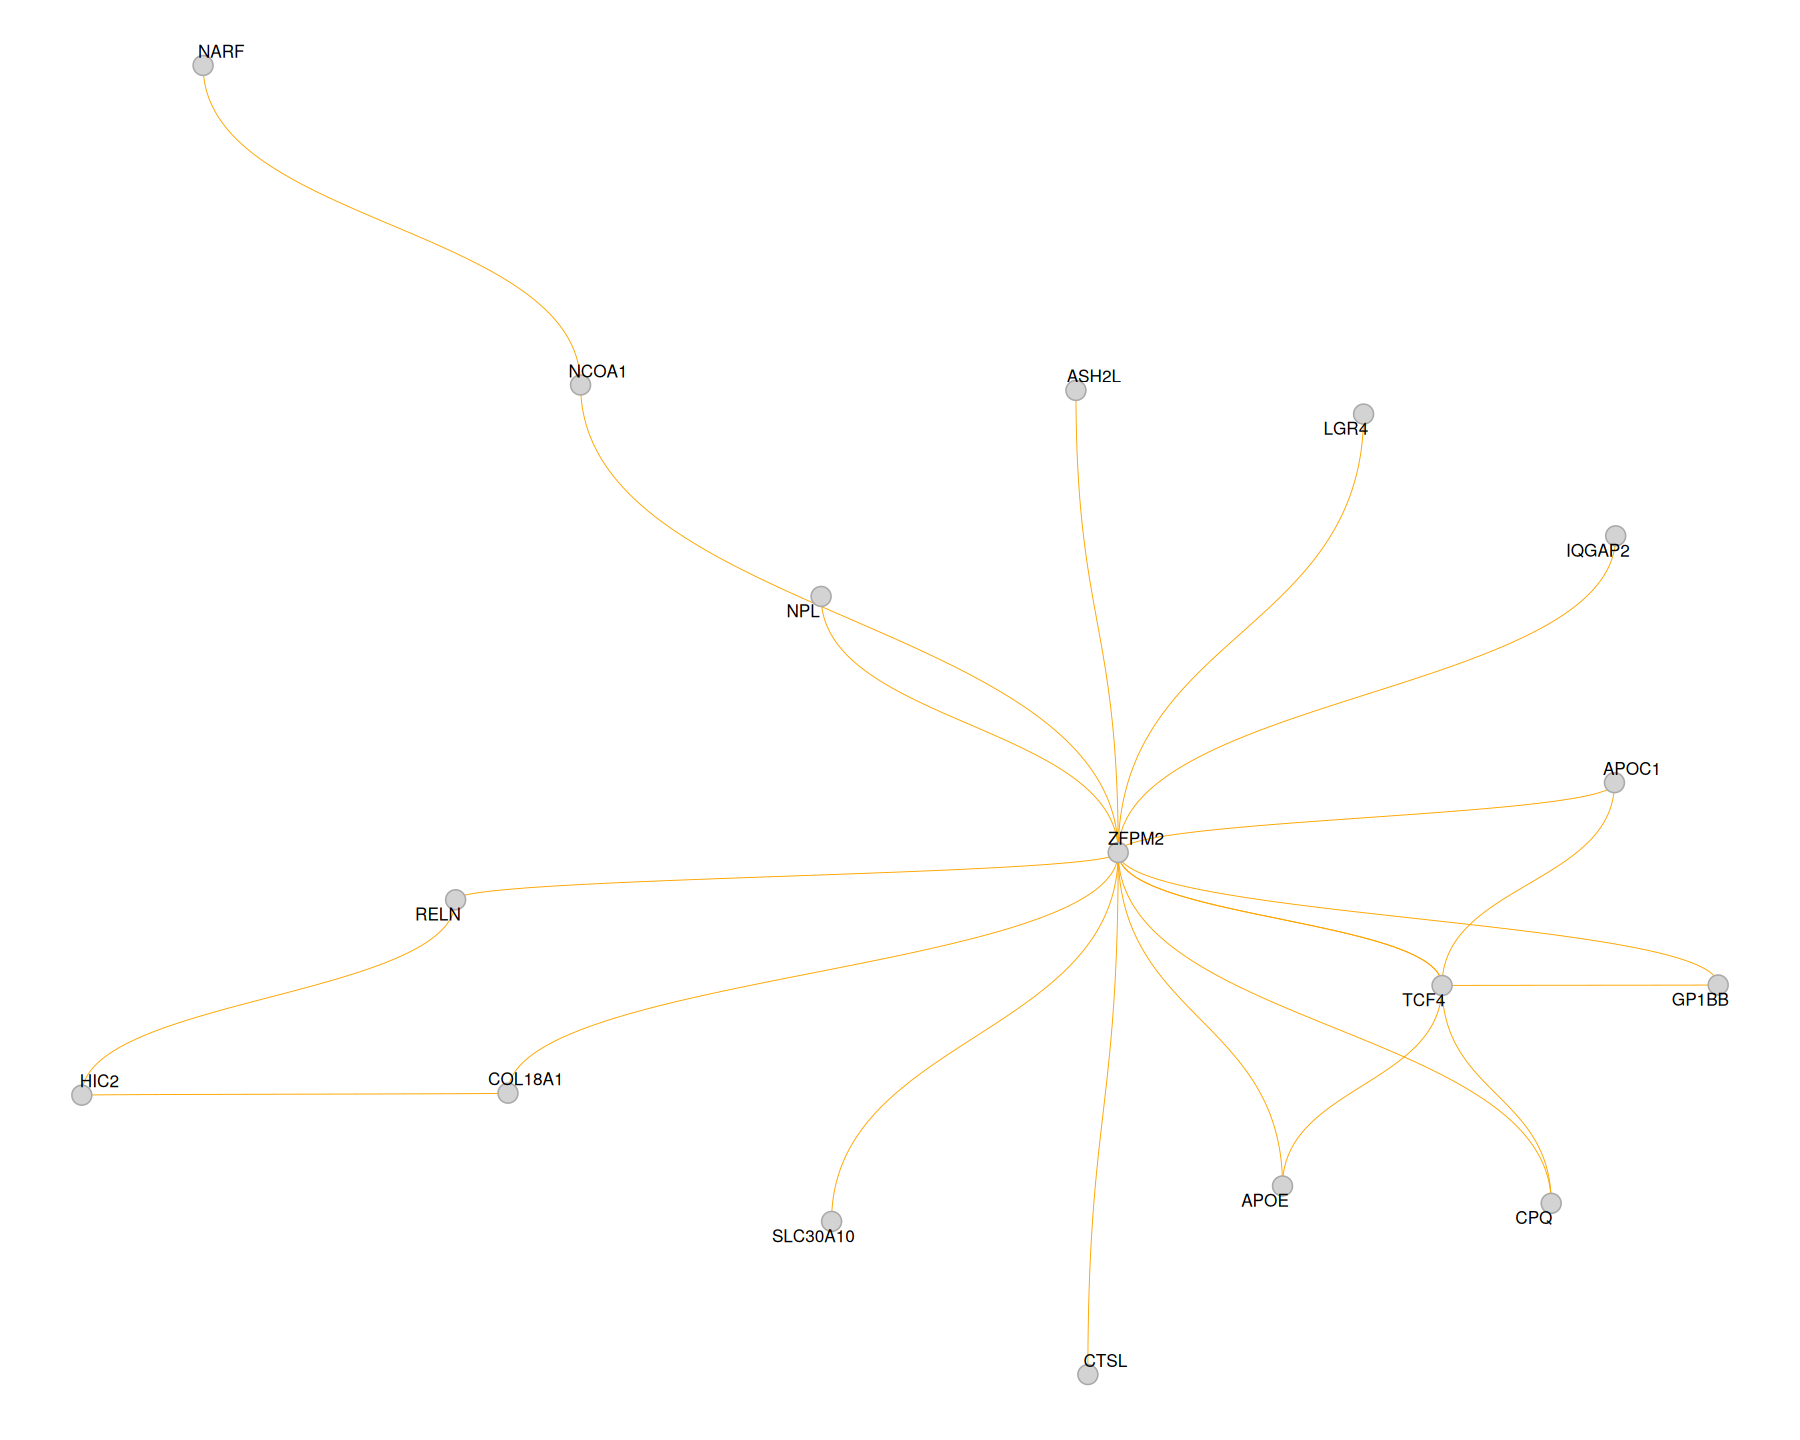

In [ ]:
plot_network_graph(sobj, graph='sub_graph', layout='fr', color_nodes=F, node_size=5)

## Plot DE Genes from DASA HIC2 vs DASA NT

In [12]:
feature_list <- read.csv('{PATH_1}')

In [13]:
feature_list[feature_list$avg_log2FC>0,1]

[1] "HBA1"         "MGST3"        "PRDX2"        "AMMECR1"      "CTSE"        
  [6] "HBG2"         "TMEM14B"      "HBG1"         "TMEM14C"      "STAR"        
 [11] "ESPN"         "AC016629.2"   "SLC4A1"       "ABCB9"        "ATF7IP2"     
 [16] "HBA2"         "AHSP"         "WIPF3"        "CR1L"         "AL442636.1"  
 [21] "MGST2"        "NDFIP1"       "SPECC1"       "CLTCL1"       "ATP5IF1"     
 [26] "PKLR"         "HMBS"         "MAN1A1"       "AC007563.2"   "SLC39A8"     
 [31] "AC079804.3"   "ZNF83"        "UGCG"         "LINC01748"    "SCPEP1"      
 [36] "ANK1"         "GRK4"         "AK1"          "MARCKSL1"     "CD58"        
 [41] "FADS1"        "TNNI3"        "PSTPIP2"      "MIS18BP1"     "CALM3"       
 [46] "DGAT1"        "CABIN1"       "KSR1"         "HBM"          "OAT"         
 [51] "NMNAT3"       "SLC6A19"      "BLVRB"        "HBZ"          "UBXN4"       
 [56] "SGMS1"        "PAM16"        "LRP10"        "GSTO1"        "OPTN"        
 [61] "NPW"          "VPS13D"       "FAM210B"      "EGFL8"        "PPT2"        
 [66] "CTSB"         "TMEM191C"     "LIPH"         "REEP6"        "ITLN1"       
 [71] "FGF13"        "NAPEPLD"      "MARCH3"       "APLP2"        "HIST1H1C"    
 [76] "RTL9"         "PLCD1"        "HDAC1"        "OSBPL8"       "PPIF"        
 [81] "PPARA"        "RAB3IP"       "TNFRSF14-AS1" "CYB561A3"     "NLK"         
 [86] "PARP14"       "AL713998.1"   "UQCR10"       "DENND4A"      "MAK"         
 [91] "FAM83A"       "SLC25A29"     "BUD23"        "NUSAP1"       "STAM"        
 [96] "ETFA"         "PTPRF"        "SLC41A1"      "TOP1"         "SLC30A1"     
[101] "UCP2"         "TFR2"         "GRAP2"        "AL137001.2"   "DYNLL1"      
[106] "CYP20A1"      "INSIG1"       "ZNF431"       "PRELID2"      "ZBTB16"      
[111] "SLC18B1"      "TFRC"         "PSME1"        "OSBPL9"       "SLC44A5"     
[116] "COMT"         "GATA1"        "RTN4"         "TFDP1"        "LINC01578"   
[121] "HSP90AA1"     "NFIA"         "AL713998.3"   "UBC"          "CEBPB"       
[126] "EIF1B"        "CFD"          "SH3GL3"       "UBA6"         "SLC25A37"    
[131] "GAB3"         "HLTF"         "RPL8"         "CLSTN3"       "PRG2"        
[136] "C11orf21"     "AL031123.5"   "COX7C"

In [ ]:
sobj <- get_network_graph(
    sobj, 
    graph_name = 'sub_graph', 
    umap_method = 'none',
    features = feature_list[feature_list$avg_log2FC>0,1])

Getting network graph



In [ ]:
plot_network_graph(sobj, graph='sub_graph', layout='fr', color_nodes=F, node_size = 5)

In [ ]:
# upreg'd in dying cells

Getting network graph



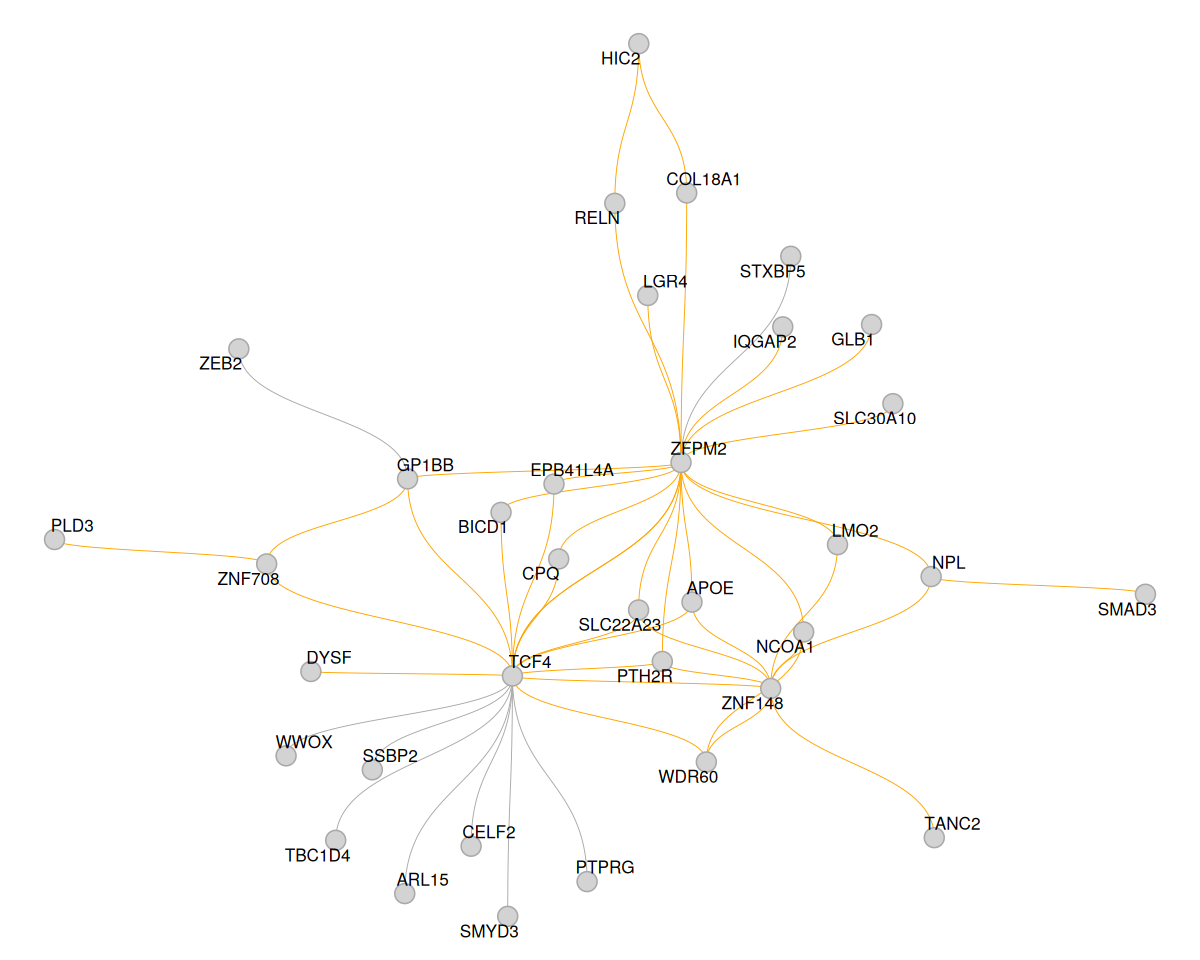

In [14]:
# down reg genes
sobj <- get_network_graph(
    sobj, 
    graph_name = 'sub_graph', 
    umap_method = 'none',
    features = feature_list[feature_list$avg_log2FC<0,1])

plot_network_graph(sobj, graph='sub_graph', layout='fr', color_nodes=F, node_size = 5, text_size = 15,
edge_color = c('hotpink', 'turquoise'),
edge_width = 1)

In [ ]:
# upreg'd in dasa treatment for surviving dasa treatment == causees cells to survive in prescence of dasa
# plotting these genes on umap we'll see increased expression in dasa nt cluster